In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsapi

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime

yesterday = (datetime.datetime.today() - datetime.timedelta(days = 1)).strftime("%m_%d_%Y")
today = datetime.datetime.today().strftime("%m_%d_%Y")

In [12]:
hits = pd.concat([pd.read_csv("data/player_stats/player_stats_08_08_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_09_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_14_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_15_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_17_2019.csv")
                 ], sort=False)

In [14]:
hits.set_index(np.arange(len(hits)), inplace=True)

In [15]:
hits['player_got_hit'] = hits['player_got_hit'].apply(float)

In [16]:
hits

,Name,ID,Team,gamesPlayed,groundOuts,runs,doubles,triples,homeRuns,strikeOuts,...,whip_p5G,winPercentage_p5G,atBats_h2h,avg_h2h,hits_h2h,obp_h2h,ops_h2h,slg_h2h,pitcher_hitter_opposite_hand,player_got_hit
0,Bo Bichette,666182,141,11.0,10.0,7.0,9.0,0.0,4.0,11.0,...,1.33,1.0,3.0,0.333,1.0,0.333,1.666,1.333,0.0,1.0
1,Brandon Drury,592273,141,89.0,82.0,34.0,15.0,1.0,13.0,87.0,...,1.33,1.0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0
2,Cavan Biggio,624415,141,60.0,37.0,39.0,7.0,0.0,10.0,71.0,...,1.33,1.0,4.0,0.000,0.0,0.200,0.200,0.000,1.0,0.0
3,Danny Jansen,643376,141,87.0,72.0,29.0,12.0,1.0,9.0,66.0,...,1.33,1.0,2.0,0.500,1.0,0.500,1.000,0.500,0.0,0.0
4,Derek Fisher,605233,141,24.0,20.0,11.0,2.0,1.0,3.0,21.0,...,1.33,1.0,2.0,0.500,1.0,0.500,2.500,2.000,1.0,1.0
5,Freddy Galvis,520471,141,112.0,102.0,54.0,23.0,1.0,18.0,110.0,...,1.33,1.0,6.0,0.333,2.0,0.333,0.666,0.333,1.0,1.0
6,Justin Smoak,475253,141,94.0,82.0,43.0,8.0,0.0,18.0,79.0,...,1.33,1.0,10.0,0.200,2.0,0.200,0.500,0.300,1.0,0.0
7,Lourdes Gurriel Jr.,666971,141,79.0,65.0,50.0,18.0,2.0,19.0,79.0,...,1.33,1.0,9.0,0.222,2.0,0.222,0.444,0.222,0.0,1.0
8,Randal Grichuk,545341,141,109.0,90.0,52.0,19.0,2.0,19.0,125.0,...,1.33,1.0,7.0,0.000,0.0,0.125,0.125,0.000,0.0,0.0
9,Reese McGuire,624512,141,7.0,7.0,4.0,1.0,0.0,2.0,7.0,...,1.33,1.0,2.0,1.000,2.0,1.000,2.500,1.500,1.0,1.0


In [17]:
data = hits.iloc[:, 3:-1]
data

,gamesPlayed,groundOuts,runs,doubles,triples,homeRuns,strikeOuts,baseOnBalls,intentionalWalks,hits,...,walksPer9Inn_p5G,whip_p5G,winPercentage_p5G,atBats_h2h,avg_h2h,hits_h2h,obp_h2h,ops_h2h,slg_h2h,pitcher_hitter_opposite_hand
0,11.0,10.0,7.0,9.0,0.0,4.0,11.0,4.0,0.0,20.0,...,2.00,1.33,1.0,3.0,0.333,1.0,0.333,1.666,1.333,0.0
1,89.0,82.0,34.0,15.0,1.0,13.0,87.0,19.0,0.0,71.0,...,2.00,1.33,1.0,0.0,0.000,0.0,0.000,0.000,0.000,0.0
2,60.0,37.0,39.0,7.0,0.0,10.0,71.0,42.0,0.0,44.0,...,2.00,1.33,1.0,4.0,0.000,0.0,0.200,0.200,0.000,1.0
3,87.0,72.0,29.0,12.0,1.0,9.0,66.0,23.0,0.0,57.0,...,2.00,1.33,1.0,2.0,0.500,1.0,0.500,1.000,0.500,0.0
4,24.0,20.0,11.0,2.0,1.0,3.0,21.0,7.0,0.0,15.0,...,2.00,1.33,1.0,2.0,0.500,1.0,0.500,2.500,2.000,1.0
5,112.0,102.0,54.0,23.0,1.0,18.0,110.0,21.0,1.0,119.0,...,2.00,1.33,1.0,6.0,0.333,2.0,0.333,0.666,0.333,1.0
6,94.0,82.0,43.0,8.0,0.0,18.0,79.0,66.0,1.0,66.0,...,2.00,1.33,1.0,10.0,0.200,2.0,0.200,0.500,0.300,1.0
7,79.0,65.0,50.0,18.0,2.0,19.0,79.0,20.0,0.0,82.0,...,2.00,1.33,1.0,9.0,0.222,2.0,0.222,0.444,0.222,0.0
8,109.0,90.0,52.0,19.0,2.0,19.0,125.0,30.0,0.0,100.0,...,2.00,1.33,1.0,7.0,0.000,0.0,0.125,0.125,0.000,0.0
9,7.0,7.0,4.0,1.0,0.0,2.0,7.0,0.0,0.0,7.0,...,2.00,1.33,1.0,2.0,1.000,2.0,1.000,2.500,1.500,1.0


In [18]:
labels = hits.iloc[:, -1]
labels

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
5       1.0
6       0.0
7       1.0
8       0.0
9       1.0
10      0.0
11      1.0
12      0.0
13      1.0
14      0.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      0.0
21      0.0
22      0.0
23      1.0
24      1.0
25      0.0
26      0.0
27      0.0
28      1.0
29      1.0
       ... 
1487    1.0
1488    1.0
1489    0.0
1490    0.0
1491    0.0
1492    1.0
1493    0.0
1494    0.0
1495    1.0
1496    1.0
1497    1.0
1498    0.0
1499    0.0
1500    0.0
1501    0.0
1502    1.0
1503    1.0
1504    0.0
1505    0.0
1506    1.0
1507    1.0
1508    0.0
1509    1.0
1510    1.0
1511    0.0
1512    0.0
1513    1.0
1514    1.0
1515    0.0
1516    1.0
Name: player_got_hit, Length: 1517, dtype: float64

In [19]:
# data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2)
data_train, data_val, labels_train, labels_val = train_test_split(data, labels, test_size=0.2)

In [20]:
np.mean(labels_train == 0)

0.494641384995878

In [21]:
np.mean(labels_train == 1)

0.505358615004122

In [22]:
hits.columns

Index(['Name', 'ID', 'Team', 'gamesPlayed', 'groundOuts', 'runs', 'doubles',
       'triples', 'homeRuns', 'strikeOuts', 'baseOnBalls', 'intentionalWalks',
       'hits', 'hitByPitch', 'avg', 'atBats', 'obp', 'slg', 'ops',
       'caughtStealing', 'stolenBases', 'stolenBasePercentage',
       'groundIntoDoublePlay', 'numberOfPitches', 'plateAppearances',
       'totalBases', 'rbi', 'leftOnBase', 'sacBunts', 'sacFlies', 'babip',
       'groundOutsToAirouts', 'atBatsPerHomeRun', 'atBatsPerHomeRun_p7G',
       'avg_p7G', 'hits_p7G', 'obp_p7G', 'ops_p7G', 'slg_p7G',
       'atBatsPerHomeRun_p15G', 'avg_p15G', 'hits_p15G', 'obp_p15G',
       'ops_p15G', 'slg_p15G', 'avg_p5G', 'era_p5G', 'groundOutsToAirouts_p5G',
       'hitsPer9Inn_p5G', 'homeRunsPer9_p5G', 'inningsPitched_p5G',
       'pitchesPerInning_p5G', 'runsScoredPer9_p5G',
       'stolenBasePercentage_p5G', 'strikePercentage_p5G',
       'strikeoutWalkRatio_p5G', 'strikeoutsPer9Inn_p5G', 'walksPer9Inn_p5G',
       'whip_p5G', 'winP

In [23]:
sns.set(font_scale=1.5)

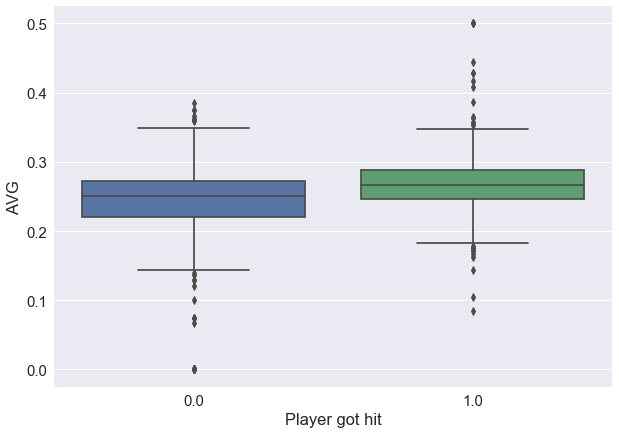

In [24]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "avg", data=hits)
ax.set(xlabel="Player got hit", ylabel="AVG")
plt.show()

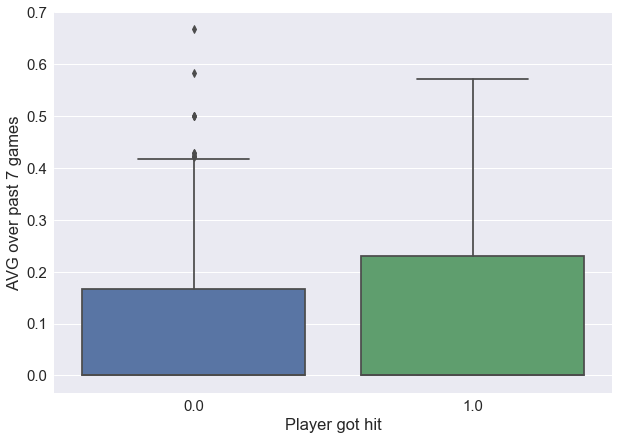

In [25]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "avg_p7G", data=hits)
ax.set(xlabel="Player got hit", ylabel="AVG over past 7 games")
plt.show()

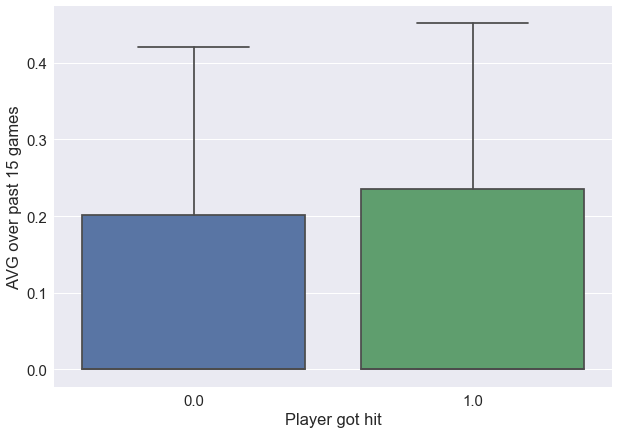

In [26]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "avg_p15G", data=hits)
ax.set(xlabel="Player got hit", ylabel="AVG over past 15 games")
plt.show()

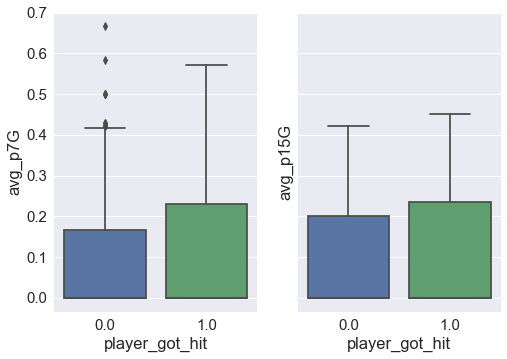

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.boxplot(x = "player_got_hit", y = "avg_p7G", data=hits, ax=ax1)
sns.boxplot(x = "player_got_hit", y = "avg_p15G", data=hits, ax=ax2)

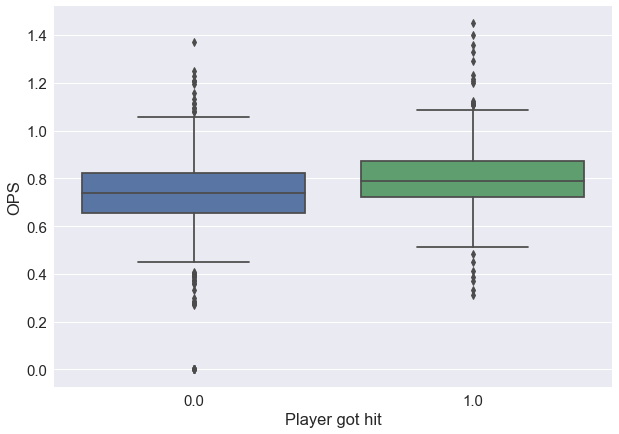

In [28]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "ops", data=hits)
ax.set(xlabel="Player got hit", ylabel="OPS")
plt.show()

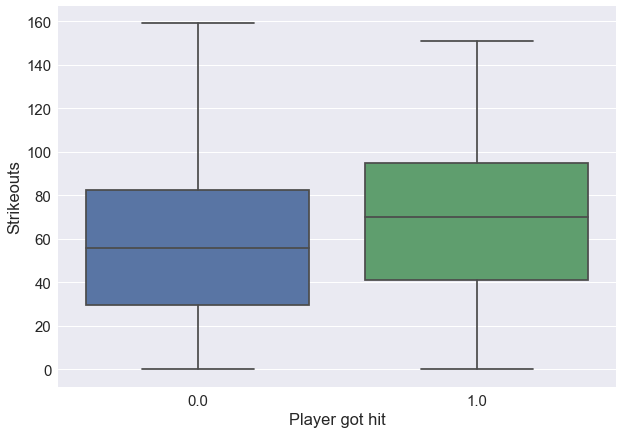

In [29]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "strikeOuts", data=hits)
ax.set(xlabel="Player got hit", ylabel="Strikeouts")
plt.show()

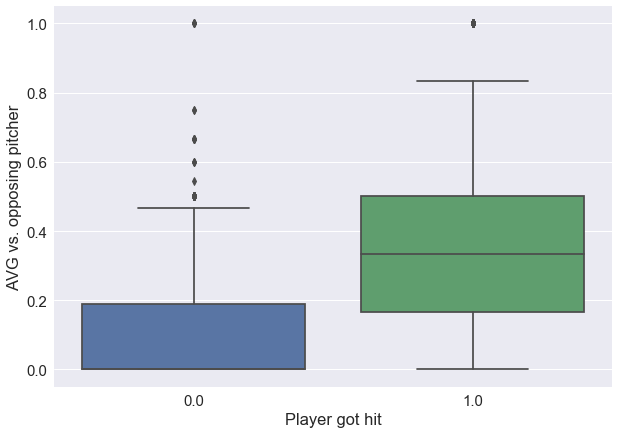

In [30]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "avg_h2h", data=hits)
ax.set(xlabel="Player got hit", ylabel="AVG vs. opposing pitcher")
plt.show()

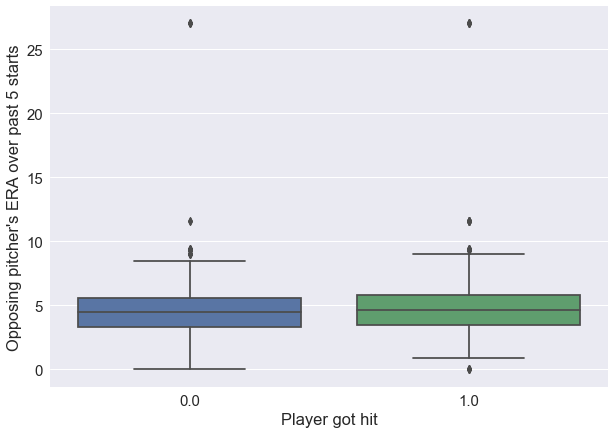

In [31]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "era_p5G", data=hits)
ax.set(xlabel="Player got hit", ylabel="Opposing pitcher's ERA over past 5 starts")
plt.show()

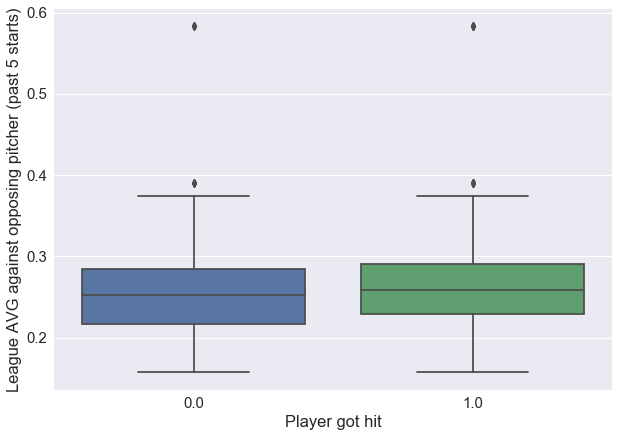

In [32]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "avg_p5G", data=hits)
ax.set(xlabel="Player got hit", ylabel="League AVG against opposing pitcher (past 5 starts)")
plt.show()

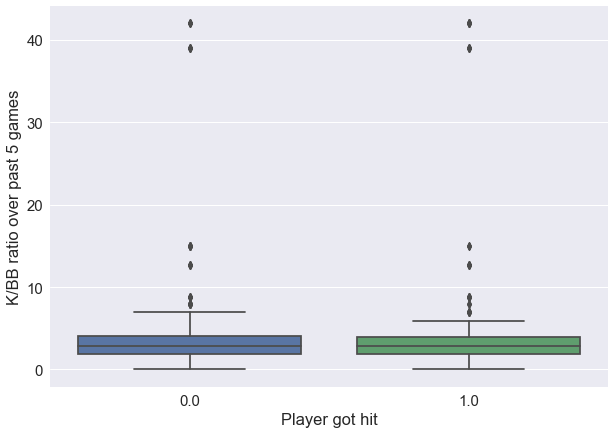

In [33]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "strikeoutWalkRatio_p5G", data=hits)
ax.set(xlabel="Player got hit", ylabel="K/BB ratio over past 5 games")
plt.show()

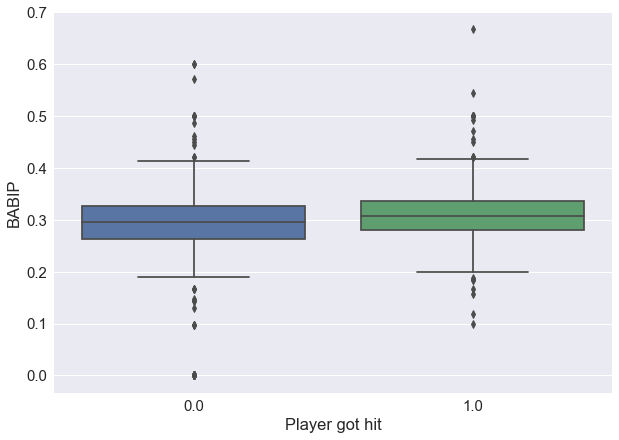

In [34]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "babip", data=hits)
ax.set(xlabel="Player got hit", ylabel="BABIP")
plt.show()

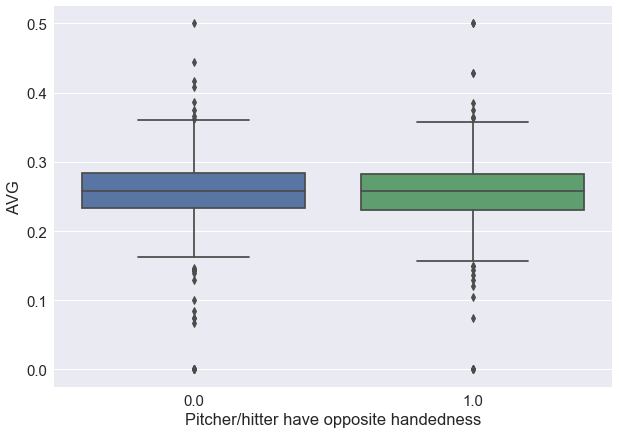

In [35]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "pitcher_hitter_opposite_hand", y = "avg", data=hits)
ax.set(xlabel="Pitcher/hitter have opposite handedness", ylabel="AVG")
plt.show()

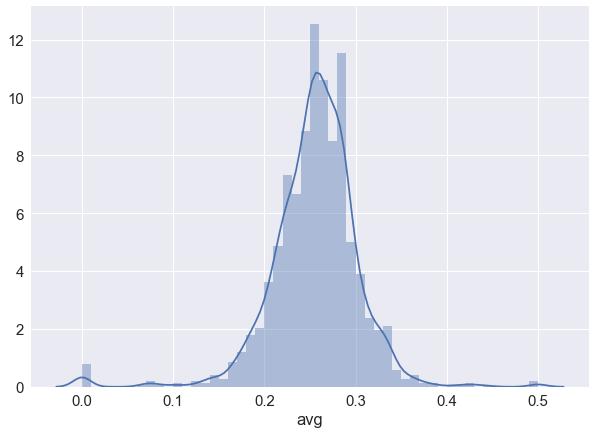

In [36]:
plt.figure(figsize=(10, 7))
sns.distplot(hits['avg'])

## Logistic Regression

In [44]:
logreg = LogisticRegression(penalty='l2').fit(data_train, labels_train)

In [45]:
np.mean(logreg.predict(data_train) == labels_train)

0.761747732893652

In [46]:
np.mean(logreg.predict(data_val) == labels_val)

0.694078947368421

In [47]:
hits.take(data_val.take(np.argsort(logreg.predict_proba(data_val)[:, 1])[::-1][:20]).index)['Name']

99           Harold Castro
24          Brian Anderson
1313         Austin Hedges
1097         Austin Slater
1003            Greg Allen
978             David Bote
614             Brock Holt
507     Fernando Tatis Jr.
944              Isan Diaz
339           JaCoby Jones
211             Mark Canha
138           Jose Ramirez
1439         Jorge Polanco
1050            J.D. Davis
1180           Yasiel Puig
501            Ketel Marte
121          Eddie Rosario
239         Yordan Alvarez
371             Adam Eaton
1044          Ozzie Albies
Name: Name, dtype: object

In [48]:
hits_test = pd.read_csv("data/player_stats/player_stats_{}.csv".format(today))
hits_test.head()

,Name,ID,Team,gamesPlayed,groundOuts,runs,doubles,triples,homeRuns,strikeOuts,...,walksPer9Inn_p5G,whip_p5G,winPercentage_p5G,atBats_h2h,avg_h2h,hits_h2h,obp_h2h,ops_h2h,slg_h2h,pitcher_hitter_opposite_hand
0,Adam Haseley,656514,143,31.0,35.0,15.0,6.0,0.0,3.0,27.0,...,4.23,1.16,0.33,0.0,0.00,0.0,1.0,0.00,0.00,0.0
1,Andrew Knapp,595284,143,59.0,22.0,10.0,4.0,0.0,1.0,33.0,...,4.23,1.16,0.33,0.0,0.00,0.0,0.0,0.00,0.00,0.0
2,Brad Miller,543543,143,52.0,20.0,12.0,3.0,1.0,4.0,26.0,...,4.23,1.16,0.33,0.0,0.00,0.0,0.0,0.00,0.00,0.0
3,Bryce Harper,547180,143,123.0,95.0,75.0,30.0,0.0,26.0,145.0,...,4.23,1.16,0.33,1.0,1.00,1.0,1.0,2.00,1.00,0.0
4,Cesar Hernandez,514917,143,123.0,141.0,54.0,23.0,3.0,8.0,71.0,...,4.23,1.16,0.33,4.0,0.25,1.0,0.4,0.65,0.25,0.0


In [49]:
data_test = hits_test.iloc[:, 3:]

In [50]:
hits_test.take(np.argsort(logreg.predict_proba(data_test)[:, 1])[::-1][:15])['Name']

69       Mike Freeman
137     Harold Castro
145      Victor Reyes
187    Mike Moustakas
178     Victor Robles
33      Rafael Devers
45       Renato Nunez
197     Hunter Dozier
97         Tom Murphy
294       Matt Thaiss
276      Alex Bregman
256    Harold Ramirez
119       Tommy Edman
34         Sam Travis
162     Justin Turner
Name: Name, dtype: object

In [51]:
precision_score(labels_val, logreg.predict(data_val))

0.6594202898550725

In [52]:
recall_score(labels_val, logreg.predict(data_val))

0.6642335766423357

In [53]:
f1_score(labels_val, logreg.predict(data_val))

0.6618181818181817

## Gradient Boosted Decision Trees -- AdaBoost

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [50, 75, 100, 125, 150]}
]

In [56]:
ada_cv = GridSearchCV(AdaBoostClassifier(), param_grid, cv=4)
ada_cv.fit(data_train, labels_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [50, 75, 100, 125, 150]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [57]:
ada_cv.best_params_

{'n_estimators': 50}

In [59]:
boosted_dt = AdaBoostClassifier(n_estimators=50)
boosted_dt.fit(data_train, labels_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [60]:
np.mean(boosted_dt.predict(data_val) == labels_val)

0.7269736842105263

In [61]:
hits_test.take(np.argsort(boosted_dt.predict_proba(data_test)[:, 1])[::-1][:10])['Name']

67        Jose Ramirez
36     Xander Bogaerts
187     Mike Moustakas
303         Jose Abreu
6        J.T. Realmuto
32        Mookie Betts
168         Adam Eaton
166          Max Muncy
158     Cody Bellinger
134      Brandon Dixon
Name: Name, dtype: object

In [62]:
precision_score(labels_val, boosted_dt.predict(data_val))

0.6956521739130435

In [63]:
recall_score(labels_val, boosted_dt.predict(data_val))

0.7007299270072993

In [158]:
f1_score(labels_val, boosted_dt.predict(data_val))

0.7360594795539033

## Random forests

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
# Tuning hyperparameters for random forests
# Note that cross-validation is sort of "automatically" done because 
# sklearn's implementation of random forests uses bagging for each 
# estimator -- more details here 
# https://scikit-learn.org/stable/modules/grid_search.html#out-of-bag-estimates

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'criterion': ['gini'], 'max_depth': [20], 'min_samples_leaf': [4, 10, 20, 30],
    'n_estimators': [50, 75, 100, 125, 150]}
]

In [198]:
rf_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=4)
rf_cv.fit(data_train, labels_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['gini'], 'max_depth': [20], 'min_samples_leaf': [4, 10, 20, 30], 'n_estimators': [50, 75, 100, 125, 150]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [199]:
best_rf_params = rf_cv.best_params_
best_rf_params

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'n_estimators': 50}

The best parameters seem to be a Gini score criterion, a max depth per tree of 20, a minimum of 10 points per leaf node, and 100 estimators.

In [200]:
rf_classifier = RandomForestClassifier(n_estimators=best_rf_params['n_estimators'], criterion=best_rf_params['criterion'], 
                                       max_depth=best_rf_params['max_depth'], min_samples_leaf=best_rf_params['n_estimators'])
rf_classifier.fit(data_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [201]:
np.mean(rf_classifier.predict(data_val) == labels_val)

0.7438330170777988

In [182]:
predictions = hits_test.take(np.argsort(rf_classifier.predict_proba(data_test)[:, 1])[::-1][:10])[['Name', 'Team']].reset_index().iloc[:, 1:]
predictions.columns = ["name", "team_id"]
predictions["team_name"] = predictions['team_id'].apply(lambda x: statsapi.lookup_team(x)[0]['name'])
predictions["hit_probability"] = np.sort(rf_classifier.predict_proba(data_test)[:, 1])[::-1][:10]
predictions.to_csv("data/predictions/predictions_{}.csv".format(today))

In [183]:
predictions

,name,team_id,team_name,hit_probability
0,David Fletcher,108,Los Angeles Angels,0.924053
1,Jorge Polanco,142,Minnesota Twins,0.905444
2,Danny Santana,140,Texas Rangers,0.871444
3,Miguel Sano,142,Minnesota Twins,0.867475
4,Bryce Harper,143,Philadelphia Phillies,0.857623
5,Xander Bogaerts,111,Boston Red Sox,0.852878
6,George Springer,117,Houston Astros,0.852669
7,Michael Conforto,121,New York Mets,0.846725
8,Shohei Ohtani,108,Los Angeles Angels,0.834135
9,J.T. Realmuto,143,Philadelphia Phillies,0.831640


In [184]:
precision_score(labels_val, rf_classifier.predict(data_val))

0.8129770992366412

In [185]:
recall_score(labels_val, rf_classifier.predict(data_val))

0.7745454545454545

In [186]:
f1_score(labels_val, rf_classifier.predict(data_val))

0.7932960893854749

In [202]:
most_important_features = np.take(hits_test.columns, np.argsort(rf_classifier.feature_importances_))[:25]
list(most_important_features)

['totalBases',
 'homeRuns',
 'sacBunts',
 'caughtStealing',
 'baseOnBalls',
 'pitchesPerInning_p5G',
 'babip',
 'rbi',
 'obp',
 'inningsPitched_p5G',
 'runs',
 'obp_h2h',
 'slg_p15G',
 'runsScoredPer9_p5G',
 'stolenBasePercentage_p5G',
 'strikeoutsPer9Inn_p5G',
 'slg',
 'gamesPlayed',
 'stolenBasePercentage',
 'ops',
 'hitByPitch',
 'ops_p15G',
 'sacFlies',
 'groundOutsToAirouts_p5G',
 'era_p5G']

## K-NN, because why not

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
# TODO: tune hyperparameters
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(data_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [191]:
np.mean(knn_clf.predict(data_val) == labels_val)

0.603415559772296

In [192]:
hits_test.take(np.argsort(knn_clf.predict_proba(data_test)[:, 1])[::-1][:10])['Name']

203    Ronald Acuna Jr.
136      Hanser Alberto
55         Kevin Newman
270        Raimel Tapia
263        Wilson Ramos
147       Freddy Galvis
84     Francisco Lindor
217       Danny Santana
32           Matt Adams
102      Randal Grichuk
Name: Name, dtype: object